In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Ente"r) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_4913.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_5357.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_1236.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_4273.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_5082.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_5904.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_4324.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_1145.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_1186.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_1125.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_5998.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_5050.JPG
/kaggle/input/sign-language-digit-dataset-version-2/Dataset/7/IMG_1176.JPG
/kaggle/input/sign-langua

# IMPORTING LIBRARIES

In [16]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd
import shutil

In [165]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Rescaling,Conv2D,MaxPooling2D,Flatten,
from tensorflow.keras.losses import categorical_crossentropy
from keras.models import load_model


In [171]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,precision_recall_fscore_support,confusion_matrix

In [4]:
data_path="/kaggle/input/sign-language-digit-dataset-version-2/Dataset"

In [5]:
def get_Dataset_Detail(path):
    classes=os.listdir(path)
    classes.sort()
    print("Number Of Classes",len(classes))
    return classes
    

In [6]:
def getDistributionOfImages(path,classes):
    count={}
    for i in classes:
        count[i]=len(os.listdir(path+"/"+i))
    return count
        
    

In [7]:
classes=get_Dataset_Detail(data_path)

Number Of Classes 10


In [8]:
dist=getDistributionOfImages(data_path,classes)

## PLOT DISTRIBUTION OF NUMBER OF IMAGES IN EACH CLASS

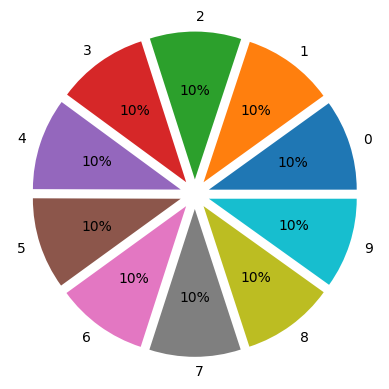

In [9]:
x=list(dist.values())
labels=list(dist.keys())
explode=[0.1 for i in labels]

plt.pie(x,labels=labels,explode=explode,autopct="%.f%%")
plt.show()

- **SO HERE ALL CLASSES ARE BALANCED AND EACH ONE IS CONTRIBUTING 10 %**
- **Now we will split our dataset intro train and test by the percentage of 80-20 %**

## SPLITING INTO TRAIN AND TEST 

In [70]:
def train_test_split(data_path,classes,train_perc,test_perc):
    train_path="./Data/train"
    test_path="./Data/test"
    if os.path.exists("./Data"):
          shutil.rmtree("./Data")


    if not os.path.exists(train_path):
        os.makedirs(train_path)
    if not os.path.exists(test_path):
        os.makedirs(test_path)
    
    for i in classes:
        if not (os.path.exists(train_path+"/"+i)):
            os.makedirs(train_path+"/"+i)
            os.makedirs(test_path+"/"+i)

        images=os.listdir(data_path+"/"+i)
        train_len=int((((train_perc*100)*len(images))//100))
     
        for image in images[:train_len]:
            shutil.copy(data_path+"/"+i+"/"+image,train_path+"/"+i)
        for image in images[train_len:]:
            shutil.copy(data_path+"/"+i+"/"+image,test_path+"/"+i)
            
    print("Done")
    return (train_path,test_path)
            
    
        
    
    
    
    

In [71]:
train_path,test_path=train_test_split(data_path,classes,0.8,0.2)

Done


In [72]:
get_Dataset_Detail(train_path)

Number Of Classes 10


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [73]:
get_Dataset_Detail(test_path)

Number Of Classes 10


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [74]:
getDistributionOfImages(train_path,classes)

{'0': 164,
 '1': 164,
 '2': 164,
 '3': 164,
 '4': 165,
 '5': 165,
 '6': 165,
 '7': 164,
 '8': 166,
 '9': 163}

In [75]:
getDistributionOfImages(test_path,classes)

{'0': 41,
 '1': 42,
 '2': 42,
 '3': 42,
 '4': 42,
 '5': 42,
 '6': 42,
 '7': 42,
 '8': 42,
 '9': 41}

# SEE RANDOM DATAS FROM DATASET

In [88]:
def seeRandomData(path,classes,train):
    for i in classes:
         randomImage=np.random.choice(os.listdir(path+"/"+i))
         plt.imshow(plt.imread(f"{path}/{i}/{randomImage}"))
         plt.title("train_"+i if train else "test_"+i)
         plt.show()


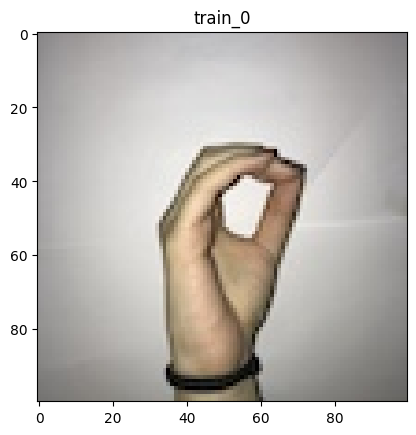

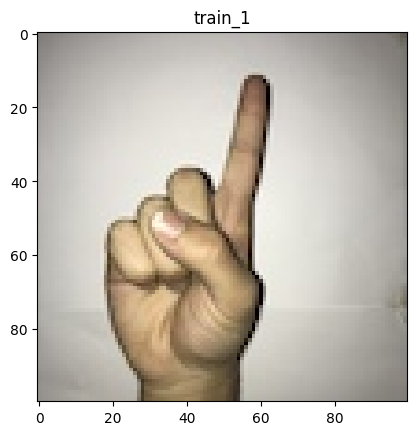

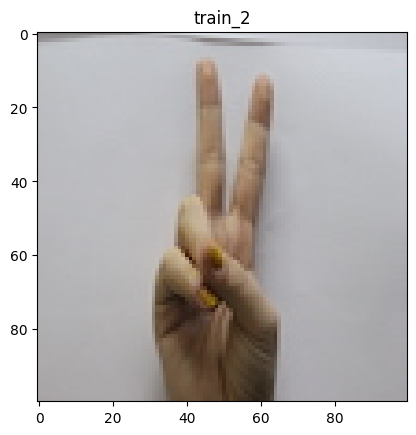

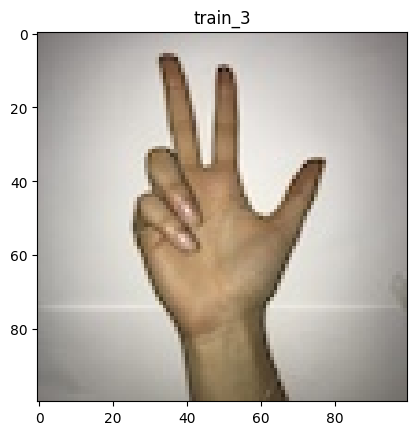

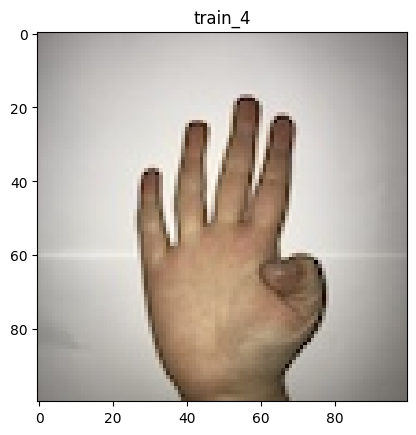

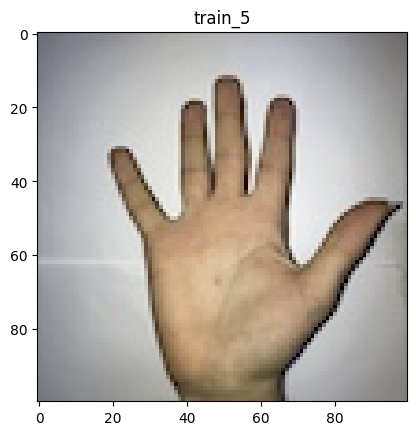

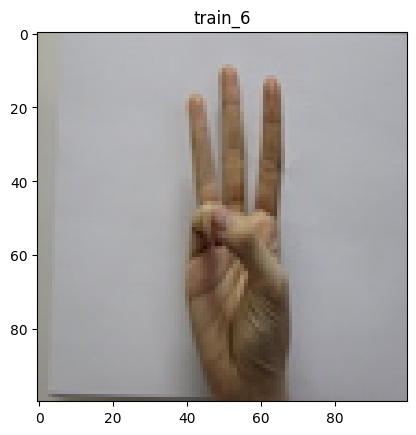

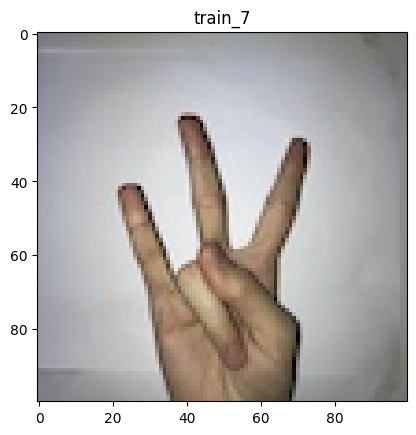

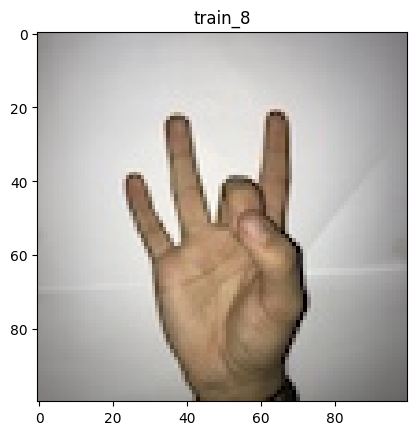

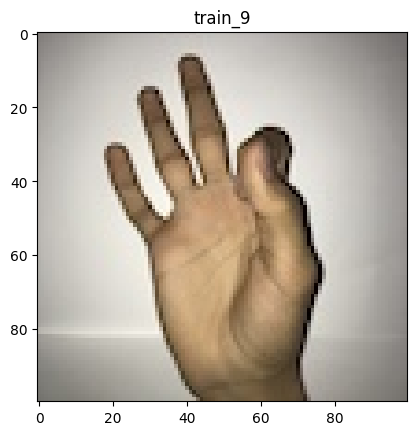

In [89]:
seeRandomData(train_path,classes,True)

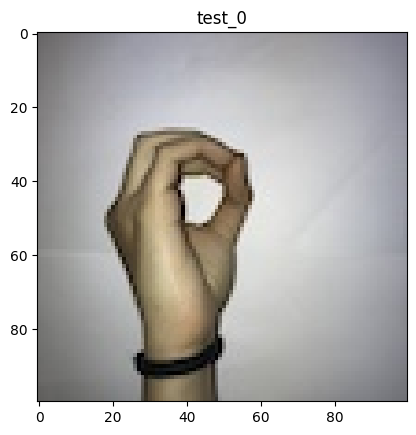

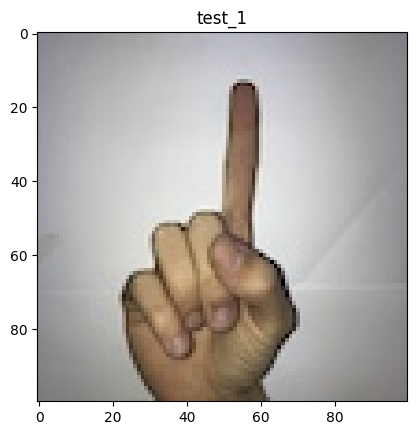

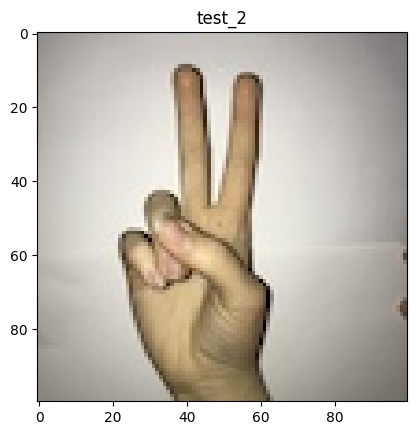

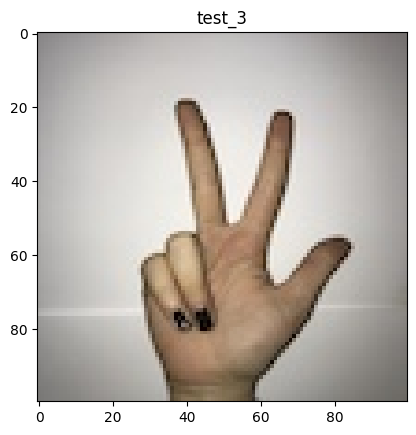

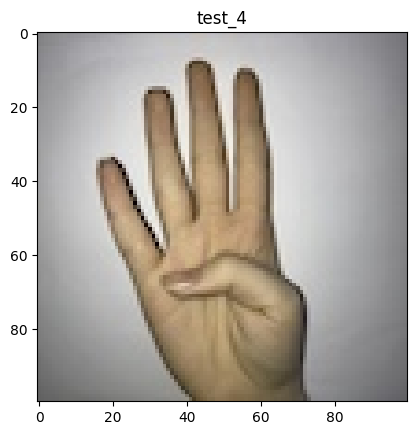

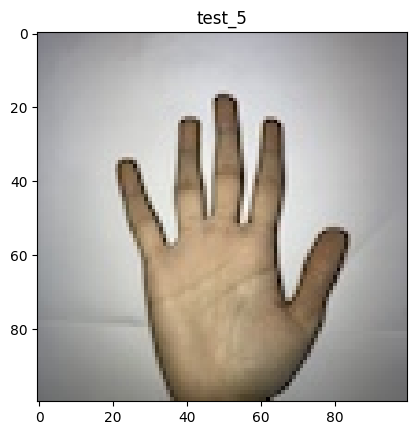

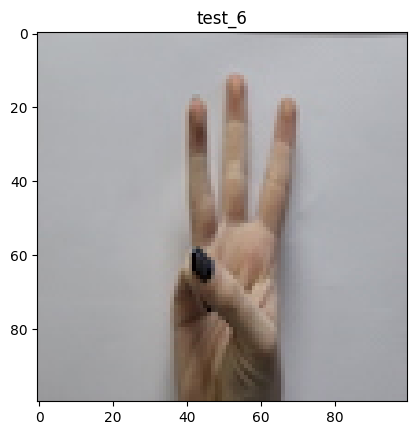

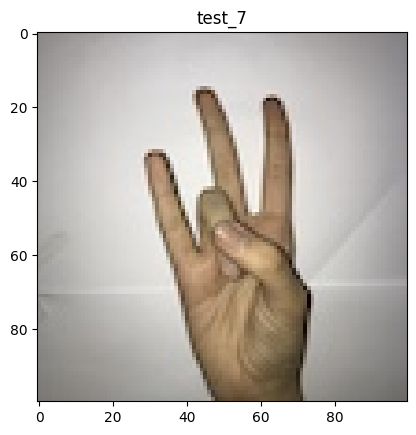

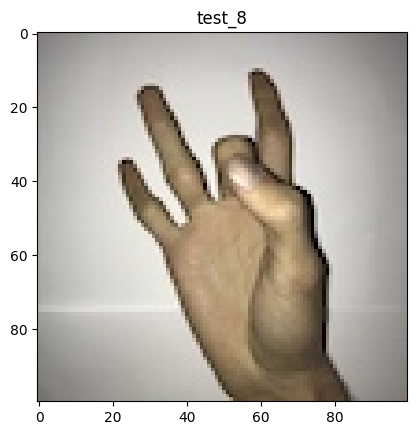

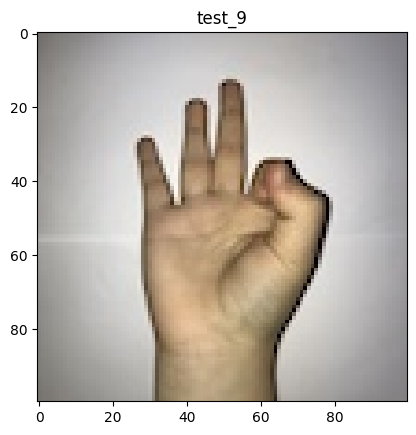

In [90]:
seeRandomData(test_path,classes,False)

# NOW WORKING ON NEURAL NETWORK

In [93]:
batch_size=32
image_size=(224,224)
train_images=tf.keras.preprocessing.image_dataset_from_directory(
                directory=train_path,
                label_mode="categorical",
                batch_size=batch_size,
                image_size=image_size,
                seed=42
                )

test_images=tf.keras.preprocessing.image_dataset_from_directory(
                directory=test_path,
                label_mode="categorical",
                batch_size=batch_size,
                image_size=image_size,
                seed=42,
    shuffle=False
                )

Found 1644 files belonging to 10 classes.
Found 418 files belonging to 10 classes.


In [94]:
train_images.class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [96]:
y_label=[]
for img, label in test_images.unbatch():
  y_label.append(label.numpy().argmax())
#   print(label)

print(y_label[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# MAKE FUNCTION FOR MODEL EVALUATION

In [163]:
def model_evaluation(y_true,y_pred):
  """MODEL EVALUATION"""
  accuracy=accuracy_score(y_true,y_pred)
  precision,recall,f1_score,_=precision_recall_fscore_support(y_true,y_pred,average="weighted",zero_division=0)
  metrices={
      "accuracy":accuracy,
      "precision":precision,
      "recall":recall,
      "f1_score":f1_score
  }
  return metrices


In [101]:
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))


    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

# USE CALLBACK

In [145]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=50,verbose=1)

In [103]:
Tensorboard_path="./callbacks/tensorboard"
ModelCheckPoint_path="./callbacks/tensorboard"

In [104]:
def create_tensorboard(model,path):
    return tf.keras.callbacks.TensorBoard(log_dir=path+"/"+model,update_freq="epoch")

In [105]:
def create_checkpoint(model,path):
    return tf.keras.callbacks.ModelCheckpoint(filepath=path+"/"+model+".keras",monitor="val_loss",save_best_only=True)

# MAKING ARCHITECTURE OF NEURAL NETWORK

In [146]:
tf.random.set_seed(42)

model=Sequential([
    Rescaling(scale=1/255.),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,padding="same"),
    Dropout(0.25),
    BatchNormalization(),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D(2,padding="same"),
    Dropout(0.25),

    BatchNormalization(),
    Conv2D(16,(3,3),activation="relu"),
    MaxPooling2D(2,padding="same"),
    Dropout(0.25),
    BatchNormalization(),
    
    Conv2D(8,(3,3),activation="relu"),
    MaxPooling2D(2,padding="same"),
    Dropout(0.25),
    BatchNormalization(),
    
    Flatten(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(8,activation="relu"),
    Dense(10,activation="softmax"),




],name="model_1")

In [147]:
model.compile(loss=categorical_crossentropy,metrics=["accuracy"],optimizer="adam")

In [148]:
history=model.fit(train_images,validation_data=test_images,epochs=100,callbacks=[early_stopping,create_tensorboard("model1",Tensorboard_path),create_checkpoint("model_1",ModelCheckPoint_path)])

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.1040 - loss: 2.3048 - val_accuracy: 0.1292 - val_loss: 2.2993
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.2162 - loss: 2.1198 - val_accuracy: 0.1555 - val_loss: 2.2278
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.3999 - loss: 1.6356 - val_accuracy: 0.0981 - val_loss: 2.6696
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5240 - loss: 1.2966 - val_accuracy: 0.0981 - val_loss: 2.8652
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6368 - loss: 1.0137 - val_accuracy: 0.1005 - val_loss: 2.9529
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7476 - loss: 0.7663 - val_accuracy: 0.0981 - val_loss: 3.7080
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7886 - loss: 0.6497 - val_accuracy: 0.1459 - val_loss: 3.4098
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8193 - loss: 0.5722 - val_accuracy: 

# MODEL EVALUATION AND SUMMARY

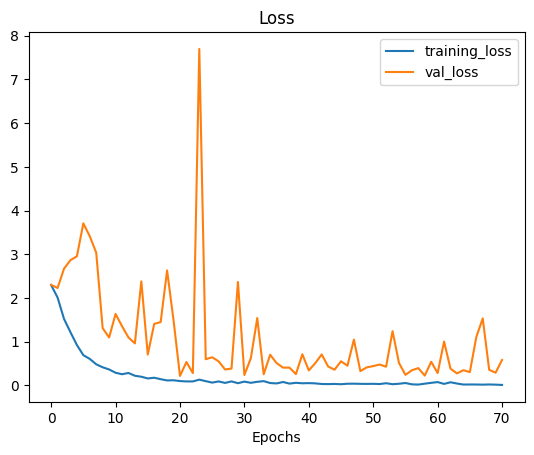

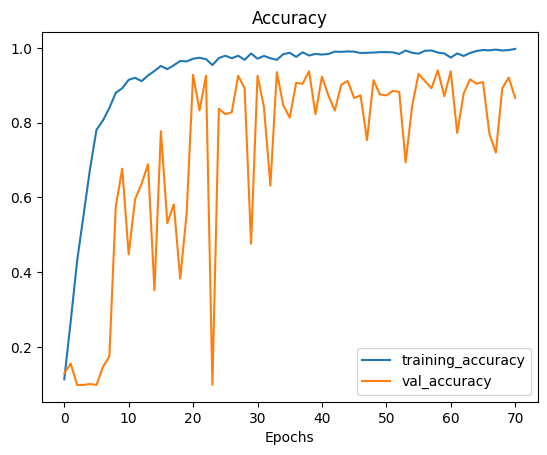

In [151]:
plot_loss_curve(history)

In [154]:
y_pred_prob=model.predict(test_images)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [160]:
y_pred=np.argmax(y_pred_prob,axis=1)

In [172]:
matrix_dict=model_evaluation(y_label,y_pred)

In [173]:
model_1_keras=load_model("callbacks/tensorboard/model_1.keras")
y_pred_prob_keras=model_1_keras.predict(test_images)
y_pred_keras=np.argmax(y_pred_prob_keras,axis=1)
matrix_dic_keras=model_evaluation(y_label,y_pred_keras)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [152]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 55, 55, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 53, 53, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 27, 27, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 25, 25, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 13, 13, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       173,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           13

 Total params: 631,904 (2.41 MB)

 Trainable params: 210,554 (822.48 KB)

 Non-trainable params: 240 (960.00 B)

 Optimizer params: 421,110 (1.61 MB)

In [179]:
matrix_dict

{'accuracy': 0.8971291866028708,
 'precision': 0.9087751752531433,
 'recall': 0.8971291866028708,
 'f1_score': 0.897994585215922}

In [197]:
df=pd.DataFrame([matrix_dict])
# Display bar charts
styled_df = df.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': [('background-color', 'yellow')]}]
)




styled_df

,accuracy,precision,recall,f1_score
0,0.897129,0.908775,0.897129,0.897995


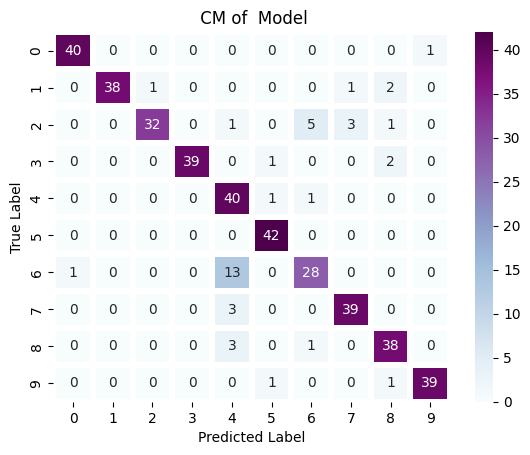

In [201]:
cm = confusion_matrix(y_label,y_pred)

sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
        xticklabels=[i for i in range(0,10)],
        yticklabels=[i for i in range(0,10)])


plt.title(' CM of  Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [202]:
model_1_keras.save("sign_lan_digit_model.h5")

# MODEL 2 WITH MORE LAYERS

In [138]:
tf.random.set_seed(42)

model2_1=Sequential([
    Rescaling(scale=1/255.),
    Conv2D(256,(3,3),activation="relu"),
    MaxPooling2D(2,padding="valid"),
    Dropout(0.3),
    BatchNormalization(),

    
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,padding="valid"),
    Dropout(0.3),
    BatchNormalization(),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,padding="valid"),
    Dropout(0.3),
    BatchNormalization(),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D(2,padding="valid"),
    Dropout(0.3),

    BatchNormalization(),
    Conv2D(16,(3,3),activation="relu"),
    MaxPooling2D(2,padding="valid"),
    Dropout(0.3),
    BatchNormalization(),
    
    Conv2D(8,(3,3),activation="relu"),
    MaxPooling2D(2,padding="valid"),
    Dropout(0.3),
    BatchNormalization(),
    
    Flatten(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(8,activation="relu"),
    Dense(10,activation="softmax"),




],name="model2_1")

In [139]:
model2_1.compile(loss=categorical_crossentropy,metrics=["accuracy"],optimizer="adam")

In [141]:
history2_1=model2_1.fit(train_images,validation_data=test_images,epochs=100,callbacks=[early_stopping,create_tensorboard("model2_1",Tensorboard_path),create_checkpoint("model2_1",ModelCheckPoint_path)],initial_epoch=26)

Epoch 27/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.6427 - loss: 0.9876 - val_accuracy: 0.7321 - val_loss: 0.7887
Epoch 28/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.6215 - loss: 0.9911 - val_accuracy: 0.2703 - val_loss: 2.2145
Epoch 29/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.6728 - loss: 0.8871 - val_accuracy: 0.7153 - val_loss: 0.7854
Epoch 30/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.6468 - loss: 0.9739 - val_accuracy: 0.6268 - val_loss: 1.1672
Epoch 31/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.6496 - loss: 0.9556 - val_accuracy: 0.7464 - val_loss: 0.8096
Epoch 32/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.6734 - loss: 0.9335 - val_accuracy: 0.6555 - val_loss: 0.9067
Epoch 33/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.6683 - loss: 0.9026 - val_accuracy: 0.6579 - val_loss: 0.8297
Epoch 34/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.7041 - loss: 0

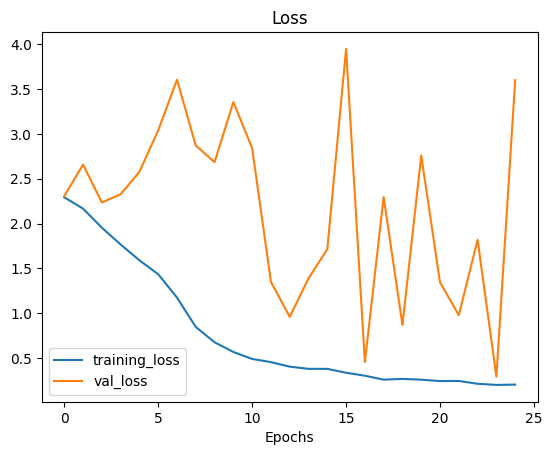

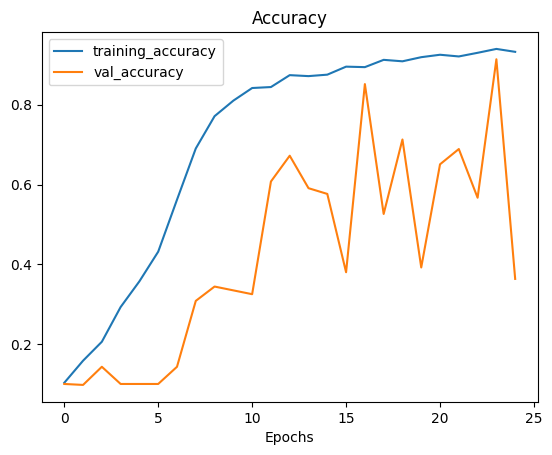

In [136]:
plot_loss_curve(history)

# DOWNLOAD FILE FROM KAGGLE NOTEBOOK

In [203]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))


In [204]:
download_file("/kaggle/working/sign_lan_digit_model.h5","sign_lan_digit_model")

/kaggle/working/sign_lan_digit_model.zip